In [18]:
import pandas as pd
input_set = pd.read_csv('Training_set_animals.csv')
input_set['image_path'] = input_set.apply(lambda x: 'train_beg/'+x.filename, axis=1)

In [2]:
input_set

,filename,animal_type,image_path
0,Image_1.jpg,mucca,train_beg/Image_1.jpg
1,Image_2.jpg,mucca,train_beg/Image_2.jpg
2,Image_3.jpg,mucca,train_beg/Image_3.jpg
3,Image_4.jpg,mucca,train_beg/Image_4.jpg
4,Image_5.jpg,mucca,train_beg/Image_5.jpg
...,...,...,...
1195,Image_1196.jpg,pecora,train_beg/Image_1196.jpg
1196,Image_1197.jpg,pecora,train_beg/Image_1197.jpg
1197,Image_1198.jpg,pecora,train_beg/Image_1198.jpg
1198,Image_1199.jpg,pecora,train_beg/Image_1199.jpg


In [19]:
input_set['animal_type'].value_counts()

mucca     600
pecora    600
Name: animal_type, dtype: int64

In [20]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

img = load_img(input_set['image_path'][0])
img_arr = img_to_array(img)
print(img_arr.shape)
print(img.width)
print(img.height)

(200, 300, 3)
300
200


In [7]:
from shutil import copyfile

for idx, row in input_set.iterrows():
    if row['animal_type']=='mucca':
        copyfile('train_beg/'+row.filename, 'train_data/mucca/'+row.filename)
    elif row['animal_type']=='pecora':
        copyfile('train_beg/'+row.filename, 'train_data/pecora/'+row.filename)

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest',
                validation_split=0.2)

datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

# img = load_img('train_data/mucca/Image_27.jpg')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# import matplotlib.pyplot as plt
    
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
# i = 0
# for batch in datagen.flow(x, batch_size=1, save_to_dir='train_data', save_prefix='mucca', save_format='jpeg'):
#     i += 1
#     if i > 20:
#         break  # otherwise the generator would loop indefinitely

In [36]:
train_data_dir = 'train_data/'
classes = ['pecora', 'mucca']
img_height = 200
img_width = 300
batch_size = 64 #128 # 32


train_generator = datagen.flow_from_directory(
        train_data_dir,
        # shuffle=True,
        classes = classes,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training')

validation_generator = datagen.flow_from_directory(
        train_data_dir,
        # shuffle=True,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(200, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

In [40]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [41]:
history = model.fit(train_generator,
                    steps_per_epoch=960//batch_size,  
                          epochs=10,
                          validation_data = validation_generator,
                          validation_steps=250//batch_size)

Epoch 1/10
15/15 [==============================] - 127s 8s/step - loss: 0.6940 - accuracy: 0.4979 - val_loss: 0.6941 - val_accuracy: 0.4635
Epoch 2/10
15/15 [==============================] - 117s 8s/step - loss: 0.6943 - accuracy: 0.4823 - val_loss: 0.6940 - val_accuracy: 0.4531
Epoch 3/10
15/15 [==============================] - 120s 8s/step - loss: 0.6905 - accuracy: 0.5104 - val_loss: 0.6997 - val_accuracy: 0.4583
Epoch 4/10
15/15 [==============================] - 121s 8s/step - loss: 0.6855 - accuracy: 0.5625 - val_loss: 0.7104 - val_accuracy: 0.4635
Epoch 5/10
15/15 [==============================] - 119s 8s/step - loss: 0.6726 - accuracy: 0.6260 - val_loss: 0.7215 - val_accuracy: 0.3646
Epoch 6/10
15/15 [==============================] - 122s 8s/step - loss: 0.6613 - accuracy: 0.6594 - val_loss: 0.7456 - val_accuracy: 0.3854
Epoch 7/10
15/15 [==============================] - 124s 8s/step - loss: 0.6452 - accuracy: 0.6875 - val_loss: 0.7802 - val_accuracy: 0.3594
Epoch 8/10
15

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescaling images to 1./255
# train_datagen = ImageDataGenerator(rescale=1.0/255, validation_split=0.2)
train_datagen = ImageDataGenerator(validation_split=0.2)

train_data_dir = 'train_data/'
classes = ['pecora', 'mucca']
img_height = 200
img_width = 300
batch_size = 64 #128 # 32


train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        shuffle=True,
        classes = classes,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        train_data_dir,
        shuffle=True,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='binary',
        subset='validation')

c:\users\shashi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\shashi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\shashi\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\shashi\

Found 960 images belonging to 2 classes.
Found 240 images belonging to 2 classes.


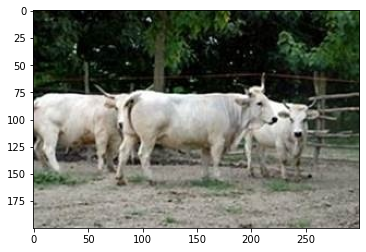

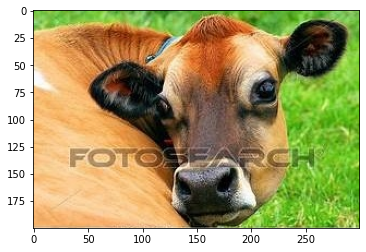

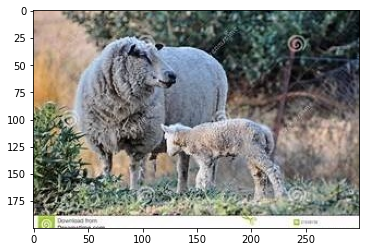

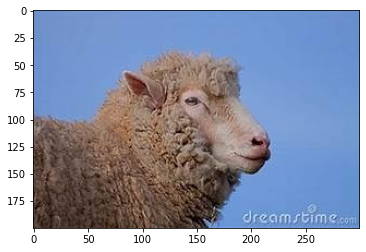

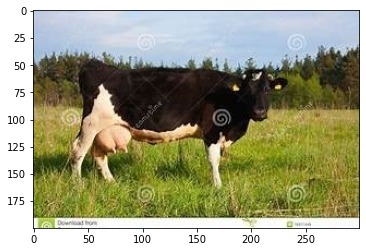

In [32]:
x,y = validation_generator.next()
import matplotlib.pyplot as plt
for i in range(5,10):
    image = x[i]
    plt.imshow(image)
    plt.show()

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 300, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dense(1, activation='sigmoid')
])

In [6]:
# optimizer  = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)
optimizer = tf.optimizers.Adam()
model.compile(optimizer=optimizer, 
              loss='binary_crossentropy', 
              metrics=['accuracy'])


In [7]:
history = model.fit(train_generator,
                    steps_per_epoch=20,  
                          epochs=15,
                          verbose=1,
                          validation_data = validation_generator,
                          validation_steps=8)

Epoch 1/15
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
20/20 [==============================] - 212s 11s/step - loss: 7.7486 - accuracy: 0.4977 - val_loss: 7.6522 - val_accuracy: 0.5000
Epoch 2/15
19/20 [===========================>..] - ETA: 8s - loss: 7.6617 - accuracy: 0.5033 

KeyboardInterrupt: 

In [60]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(2, activation=tf.nn.sigmoid)
])

# model = Sequential()
# model.add(Flatten())
#model.add(Dense(256, activation='relu', name='Dense_Intermediate'))
# model.add(Dropout(0.1, name='Dropout_Regularization'))
# model.add(Dense(12, activation='sigmoid', name='Output'))

In [53]:
num_classes = 2
img_height = 200
img_width = 300
batch_size = 32

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  # layers.Conv2D(64, 3, padding='same', activation='relu'),
  # layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [61]:
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
optimizer = tf.optimizers.Adam()
model.compile(optimizer = optimizer, 
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
# epochs=10
# history = model.fit(
#   train_generator,
#   validation_data=validation_generator,
#   epochs=epochs
# )
history = model.fit(train_generator,
                    steps_per_epoch=8,  
                          epochs=15,
                          verbose=1,
                          validation_data = validation_generator,
                          validation_steps=8)

Epoch 1/15


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [128,2] and labels shape [256]
	 [[node loss_6/output_1_loss/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at <ipython-input-62-f85f2a84db1a>:12) ]] [Op:__inference_keras_scratch_graph_17258]

Function call stack:
keras_scratch_graph


In [50]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape = (200,300,3)), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)])

In [51]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [52]:
history = model.fit(train_generator,
                    steps_per_epoch=8,  
                          epochs=15,
                          verbose=1,
                          validation_data = validation_generator,
                          validation_steps=8)

Epoch 1/15
8/8 [==============================] - 5s 575ms/step - loss: 6.7494 - accuracy: 0.5078 - val_loss: 7.7864 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 3s 372ms/step - loss: 7.7265 - accuracy: 0.4961 - val_loss: 7.7864 - val_accuracy: 0.5000
Epoch 3/15
8/8 [==============================] - 3s 355ms/step - loss: 7.9661 - accuracy: 0.4805 - val_loss: 7.6067 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 3s 383ms/step - loss: 7.2474 - accuracy: 0.5273 - val_loss: 7.6067 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 3s 383ms/step - loss: 7.7864 - accuracy: 0.4922 - val_loss: 7.6067 - val_accuracy: 0.5000
Epoch 6/15
8/8 [==============================] - 3s 378ms/step - loss: 7.5468 - accuracy: 0.5078 - val_loss: 7.6067 - val_accuracy: 0.5000
Epoch 7/15
8/8 [==============================] - 3s 360ms/step - loss: 7.7864 - accuracy: 0.4922 - val_loss: 7.6067 - val_accuracy: 0.5000
Epoch 8/15
8/8 [====

In [11]:
import tensorflow as tf
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [13]:
import tensorflow
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [9]:
input_set_pecora  = input_set[input_set['animal_type']=='pecora']
input_set_mucca  = input_set[input_set['animal_type']=='mucca']

In [21]:
import os
os.makedirs('train_data', mode=0o777, exist_ok=True)
os.makedirs('train_data/pecora', mode=0o777, exist_ok=True)
os.makedirs('train_data/mucca', mode=0o777, exist_ok=True)

In [25]:
from shutil import copyfile
for idx, row in input_set.iterrows():
    if row['animal_type']=='mucca':
        copyfile(row['image_path'], 'train_data/mucca/'+row['filename'])
    elif row['animal_type']=='pecora':
        copyfile(row['image_path'], 'train_data/pecora/'+row['filename'])

In [31]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

def transform_input(x):
    img = load_img(x)
    return img_to_array(img)

input_set['img_arr'] = input_set.apply(lambda x: transform_input(x['image_path']), axis=1)
input_set.head()

,filename,animal_type,image_path,img_arr
0,Image_1.jpg,mucca,train_beg/Image_1.jpg,"[[[205.0, 205.0, 207.0], [205.0, 205.0, 207.0]..."
1,Image_2.jpg,mucca,train_beg/Image_2.jpg,"[[[253.0, 253.0, 253.0], [253.0, 253.0, 253.0]..."
2,Image_3.jpg,mucca,train_beg/Image_3.jpg,"[[[254.0, 237.0, 221.0], [252.0, 235.0, 219.0]..."
3,Image_4.jpg,mucca,train_beg/Image_4.jpg,"[[[95.0, 114.0, 92.0], [105.0, 125.0, 100.0], ..."
4,Image_5.jpg,mucca,train_beg/Image_5.jpg,"[[[236.0, 235.0, 189.0], [245.0, 244.0, 198.0]..."


In [45]:
from tensorflow.keras.utils import to_categorical

# input_set['output_label'] = input_set.apply(lambda x: to_categorical(x['animal_type'], num_classes=2), axis=1)
# input_set
# temp = pd.get_dummies(input_set['animal_type'])
# temp
# from sklearn.preprocessing import LabelEncoder
#encoder = LabelEncoder()
# encoder.fit(input_set['animal_type'].values)
# t= encoder.transform(['mucca', 'pecora'])
input_set['output_label'] = input_set.apply(lambda x: 1.0 if x['animal_type']=='mucca' else 0.0, axis=1)
input_set

,filename,animal_type,image_path,img_arr,output_label
0,Image_1.jpg,mucca,train_beg/Image_1.jpg,"[[[205.0, 205.0, 207.0], [205.0, 205.0, 207.0]...",1.0
1,Image_2.jpg,mucca,train_beg/Image_2.jpg,"[[[253.0, 253.0, 253.0], [253.0, 253.0, 253.0]...",1.0
2,Image_3.jpg,mucca,train_beg/Image_3.jpg,"[[[254.0, 237.0, 221.0], [252.0, 235.0, 219.0]...",1.0
3,Image_4.jpg,mucca,train_beg/Image_4.jpg,"[[[95.0, 114.0, 92.0], [105.0, 125.0, 100.0], ...",1.0
4,Image_5.jpg,mucca,train_beg/Image_5.jpg,"[[[236.0, 235.0, 189.0], [245.0, 244.0, 198.0]...",1.0
...,...,...,...,...,...
1195,Image_1196.jpg,pecora,train_beg/Image_1196.jpg,"[[[88.0, 123.0, 161.0], [87.0, 122.0, 160.0], ...",0.0
1196,Image_1197.jpg,pecora,train_beg/Image_1197.jpg,"[[[84.0, 73.0, 71.0], [77.0, 66.0, 64.0], [73....",0.0
1197,Image_1198.jpg,pecora,train_beg/Image_1198.jpg,"[[[230.0, 240.0, 242.0], [226.0, 236.0, 238.0]...",0.0
1198,Image_1199.jpg,pecora,train_beg/Image_1199.jpg,"[[[15.0, 26.0, 12.0], [12.0, 23.0, 9.0], [7.0,...",0.0


In [52]:
for idx, val in input_set.iterrows():
    print(val['img_arr'])
    # print(labels_batch.shape)
    break

[[[205. 205. 207.]
  [205. 205. 207.]
  [205. 205. 207.]
  ...
  [205. 203. 204.]
  [205. 203. 204.]
  [206. 204. 205.]]

 [[203. 203. 205.]
  [203. 203. 205.]
  [204. 204. 206.]
  ...
  [204. 202. 203.]
  [206. 204. 205.]
  [207. 205. 206.]]

 [[205. 205. 207.]
  [204. 204. 206.]
  [203. 203. 205.]
  ...
  [205. 203. 204.]
  [207. 205. 206.]
  [209. 207. 208.]]

 ...

 [[247. 252. 246.]
  [251. 255. 245.]
  [250. 253. 232.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[243. 248. 241.]
  [249. 255. 241.]
  [249. 253. 230.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]

 [[245. 250. 243.]
  [251. 255. 243.]
  [251. 255. 232.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [254. 254. 254.]]]


In [54]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)